In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_train=pd.read_csv('SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_test=pd.read_csv('SalaryData_Test(1).csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Exploratory Data Analysis:

In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_test.shape

(15060, 14)

In [6]:
list(salary_train.columns)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [7]:
list(salary_test.columns)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [8]:
#drop the extra feature 'educationno'
salary_train=salary_train.drop('educationno',axis=1)
salary_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
salary_test=salary_test.drop('educationno',axis=1)
salary_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
salary_train.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
salary_test.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [12]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   maritalstatus  30161 non-null  object
 4   occupation     30161 non-null  object
 5   relationship   30161 non-null  object
 6   race           30161 non-null  object
 7   sex            30161 non-null  object
 8   capitalgain    30161 non-null  int64 
 9   capitalloss    30161 non-null  int64 
 10  hoursperweek   30161 non-null  int64 
 11  native         30161 non-null  object
 12  Salary         30161 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [15]:
salary_train.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [16]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   maritalstatus  15060 non-null  object
 4   occupation     15060 non-null  object
 5   relationship   15060 non-null  object
 6   race           15060 non-null  object
 7   sex            15060 non-null  object
 8   capitalgain    15060 non-null  int64 
 9   capitalloss    15060 non-null  int64 
 10  hoursperweek   15060 non-null  int64 
 11  native         15060 non-null  object
 12  Salary         15060 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.5+ MB


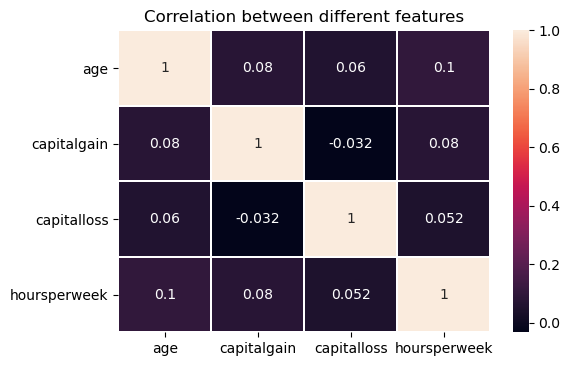

In [17]:
corr=salary_train.corr()
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(corr,annot=True,linewidths=.5,linecolor='White')
plt.title('Correlation between different features')
plt.show()

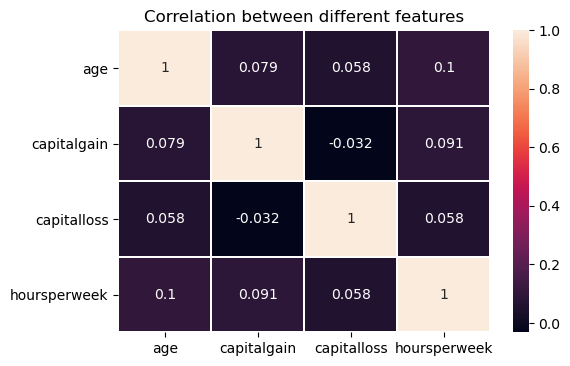

In [18]:
corr=salary_test.corr()
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(corr,annot=True,linewidths=.5,linecolor='White')
plt.title('Correlation between different features')
plt.show()

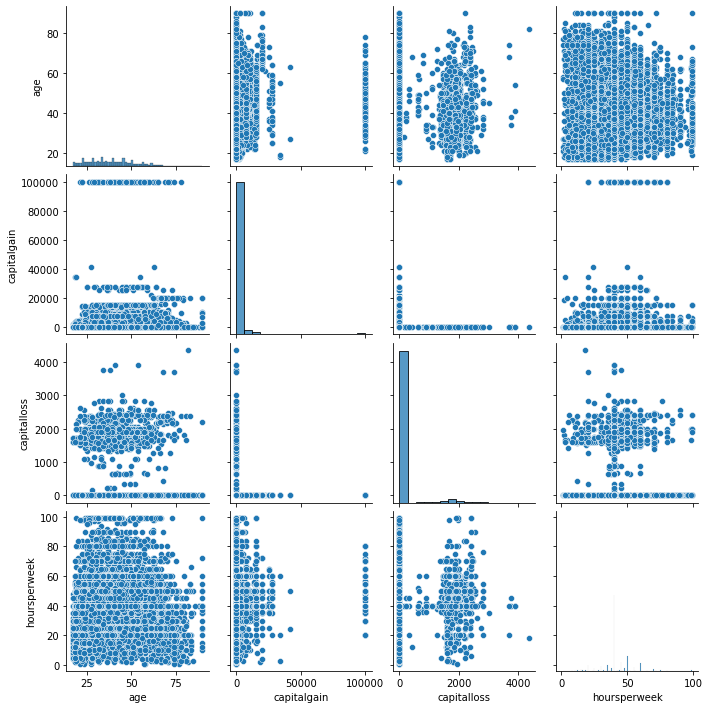

In [19]:
sns.pairplot(salary_train)
plt.show()

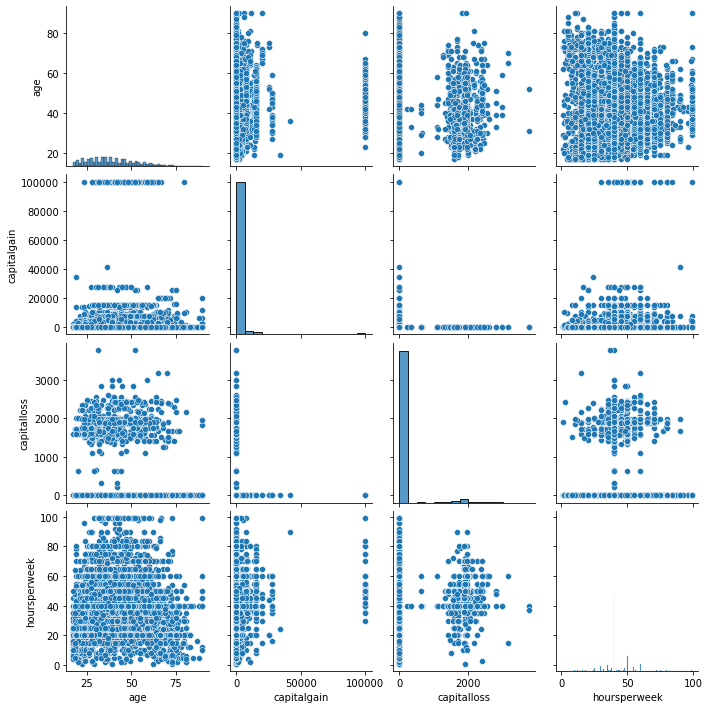

In [20]:
sns.pairplot(salary_test)
plt.show()

In [21]:
label=LabelEncoder()
salary_train['workclass']=label.fit_transform(salary_train['workclass'])
salary_train['education']=label.fit_transform(salary_train['education'])
salary_train['maritalstatus']=label.fit_transform(salary_train['maritalstatus'])
salary_train['occupation']=label.fit_transform(salary_train['occupation'])
salary_train['relationship']=label.fit_transform(salary_train['relationship'])
salary_train['race']=label.fit_transform(salary_train['race'])
salary_train['sex']=label.fit_transform(salary_train['sex'])
salary_train['native']=label.fit_transform(salary_train['native'])
salary_train['Salary']=label.fit_transform(salary_train['Salary'])
salary_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,4,0,3,4,1,0,0,20,37,0


In [22]:
salary_test['workclass']=label.fit_transform(salary_test['workclass'])
salary_test['education']=label.fit_transform(salary_test['education'])
salary_test['maritalstatus']=label.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']=label.fit_transform(salary_test['occupation'])
salary_test['relationship']=label.fit_transform(salary_test['relationship'])
salary_test['race']=label.fit_transform(salary_test['race'])
salary_test['sex']=label.fit_transform(salary_test['sex'])
salary_test['native']=label.fit_transform(salary_test['native'])
salary_test['Salary']=label.fit_transform(salary_test['Salary'])
salary_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,0,0,40,37,0
1,38,2,11,2,4,0,4,1,0,0,50,37,0
2,28,1,7,2,10,0,4,1,0,0,40,37,1
3,44,2,15,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,0,0,3,1,1,5455,0,40,37,0


### Splitting the data into input and output features

In [23]:
x_train=salary_train.drop('Salary',axis=1)
y_train=salary_train[['Salary']]
x_test=salary_test.drop('Salary',axis=1)
y_test=salary_test[['Salary']]

### Normalmization

In [24]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

### Model Building | Model Training

In [26]:
#kernel=linear
svc_linear=SVC(kernel='linear',random_state=40,gamma=0.1,C=1.0)

In [27]:
svc_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [28]:
y_pred=svc_linear.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.7931606905710491

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     11360
           1       0.69      0.29      0.40      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.62      0.64     15060
weighted avg       0.78      0.79      0.76     15060



In [31]:
#kernel=rbf
svc_rbf=SVC(kernel='rbf',random_state=40,gamma=0.1,C=1.0)

In [32]:
svc_rbf.fit(x_train,y_train)

SVC(gamma=0.1, random_state=40)

In [33]:
y_pred1=svc_rbf.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred1)

0.7965471447543161

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     11360
           1       0.69      0.29      0.40      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.62      0.64     15060
weighted avg       0.78      0.79      0.76     15060



In [36]:
#kernel=poly
svc_poly=SVC(kernel='poly',random_state=40,gamma=0.1,C=1.0)

In [37]:
svc_poly.fit(x_train,y_train)

SVC(gamma=0.1, kernel='poly', random_state=40)

In [38]:
y_pred2=svc_poly.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred2)

0.7791500664010624

In [40]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87     11360
           1       0.76      0.15      0.25      3700

    accuracy                           0.78     15060
   macro avg       0.77      0.57      0.56     15060
weighted avg       0.77      0.78      0.72     15060



In [41]:
#Using Sigmoid
svc_sigmoid=SVC(kernel='sigmoid',random_state=40,gamma=0.1,C=1.0)

In [42]:
svc_sigmoid.fit(x_train,y_train)

SVC(gamma=0.1, kernel='sigmoid', random_state=40)

In [43]:
y_pred3=svc_sigmoid.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     11360
           1       0.56      0.19      0.29      3700

    accuracy                           0.76     15060
   macro avg       0.67      0.57      0.57     15060
weighted avg       0.73      0.76      0.72     15060



In [45]:
accuracy_score(y_test,y_pred3)

0.7642762284196547

### Using GridSearchCV

In [46]:
svc_model=SVC()
param_grid={'kernel':['linear','rbf','poly','sigmoid'],'gamma':['0.1',1,'scale','auto']}
grid_search=GridSearchCV(svc_model,param_grid,cv=5)
grid_search.fit(x_train,y_train)
print('best params :',grid_search.best_params_)
print('best estimator :',grid_search.best_estimator_)
print('best score :',grid_search.best_score_)

best params : {'gamma': 1, 'kernel': 'rbf'}
best estimator : SVC(gamma=1)
best score : 0.8175458552233273
